<a id="top"></a>
# **8.1 Nonlinear moment-curvature relationship**

<div style="background-color:lightgray;text-align:left"> <img src="../icons/start_flag.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Starting point</b> </div> 

With the coverage of bond and cracking behavior, we can now approach the simulation of a composite as a whole. The described material models can be found and used in general finite-element tools. As shown in the previous tour, it is possible to simulate the nonlinear, inelastic material response using 3D or 2D finite element models. However, in engineering practice, more specialized methods of structural analysis and design are desired which allow us to deliver quick answers to repeating design questions. A frequent application of composite materials is provided in form of a beam exposed to bending. Let us show how to utilize the models and theory explained during the previous Tours and show how to apply them to provide an efficient and general method for an assessment of a reinforced beam.  

<div style="background-color:lightgray;text-align:left"> <img src="../icons/destination.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Where are we heading</b> </div> 

One fundamental concept of engineering design is to decompose a complex problem into smaller subproblems that can be described and managed in a more transparent way. This concept is relevant also for the description of structural behavior. The present notebook shows such a decomposition for a nonlinear structural analysis of an arbitrarily reinforced beam. It can consider steel, carbon, glass, basalt reinforcement with correspondingly defined constitutive laws. At the same time, various cross sectional shapes can be included as well.

Using the analysis method explained in the present notebook, is is possible  to explain the fundamental differences between the design of traditional steel-reinforced concrete structures, and the innovative TRC and carbon concrete structures. Understanding of these differences is crucial for achieving more economic, durable and, thus, sustainable design of structures in the future.

# **Quick structural analysis and assessment of arbitrary beam design**

For motivation, consider some examples of concrete girders reinforced with CFRP rebars, carbon textile fabrics and AR-glass fabrics.

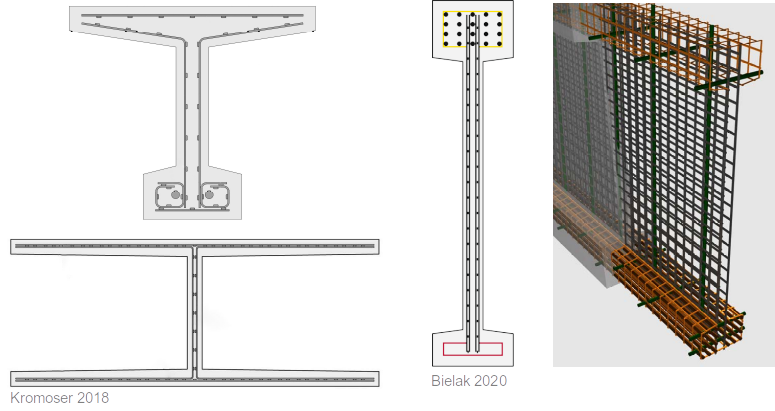

# **Beam deflection calculated by integrating curvature** 

Recalling the concepts of beam kinematics and equilibrium, we can sketch the computational scheme using the following diagram. 

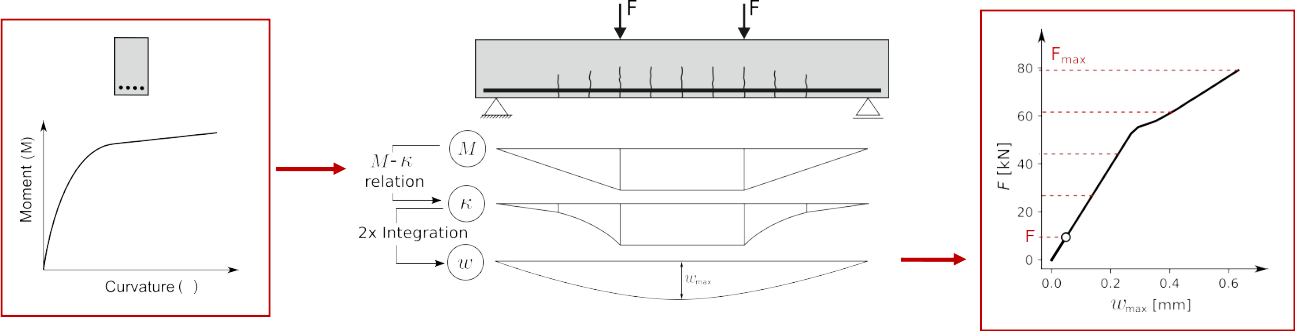

In case of a simply supported beam, the profile of the bending moment is known a-priori. Because the structure is statically determinate, the profile of stress resultantants does not depend on the material properties and on the current state of its inelastic degradation. In other words, there are no redistribution effects along the beam. Therefore, if we are able to derive the relation between the bending moment $M$ and the local curvature $\kappa$, qualitatively illustrated in the left figure above, we can directly calculate the profile of cross-sectional rotation along the beam by integrating the curvature, i.e.
$$
 \varphi(x) = \int_0^L \kappa(x) \, \mathrm{d}x + C.
$$
By integrating this rotation profile along the beam again, we obtain the deflection as 
$$
 w(x) = \int_0^L \varphi(x) \, \mathrm{d}x + Cx + D.
$$
The integration constants must be solved for particular boundary conditions.

Given this evaluation, we can directly construct the load-deflection curve depicted in the right diagram of the above Figure. The appealing feature of this evaluation scheme is the efficiency in comparison to a nonlinear finite-element model. But what is the price to pay for a more efficient analysis compared to general finite element simulation? Either the finite element analysis is unnecessarily general with a lot of computational effort spent on insignificant details of the calculation, or the simple integration approach is less accurate. Both answers can be true. Still for beams with predominantly flexural loading, for which a linear profile of strain along the cross-sectional height can be assumed, the sketched approach to evaluation is sufficient. 

The assumption of a linear strain profile along the beam height is the key to this simplified evaluation of the nonlinear load deflection response of reinforced beams. Based on this assumption, a direct quantification of the $M(\kappa$) relation for any cross-sectional design becomes possible. Then, the load-deflection can be obtained in two steps 
 * quantification of the moment curvature relation by solving the equilibrium condition in the normal direction for any given curvature to obtaine $M(\kappa)$,
 * repeated double integration of the curvature profile coresponding to the distribution of the moment $M(x)$ along for a prescribed load as described above.

Thus, what remains to be described is how to quantify the 
cross-sectional constitutive law $M(\kappa)$.

# **Cross section based nonlinear constitutive law**

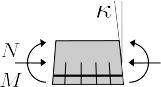

To quantify the $M(\kappa)$ relation, given a particular cross sectional shape and reinforcement distribution, we need to simulate the stress redistribution process occurring over a cross sectional height upon an ongoing cracking. The simulation of the bending response of the notched beam demonstrated in the notebook [7.1](../tour7_cracking/7_1_bending3pt_2d.ipynb#top) has already demonstrated the propagation of the stress peak through the cross section. While the example shown there considered a 2D finite element discretization of plain concrete without reinforcement, in the present notebook, we shall consider a 1D idealization of a cross section with $z$ denoting the vertical position and, additionally, consider also the effect of the reinforcement bridging this cross section at a specified height $z_i$.

The computational procedure is schematically shown in the Figure below. The key assumption
saying that the cross sections remain planar and normal to the deflection curve is used to 
establish the relation between the curvature and strain profile along the beam height. Then,
the curvature can be defined as
\begin{align}
\kappa = \frac{\partial \varepsilon_{xx}}{\partial z}
\end{align}
Demoting the strains at the top and bottom of the cross section as $\varepsilon_\mathrm{top}$ and $\varepsilon_\mathrm{bot}$,
we can directly evaluate the derivative of strain over the height as
\begin{align}
\kappa = \frac{\varepsilon_\mathrm{top} - \varepsilon_\mathrm{bot}}{h}
\end{align}

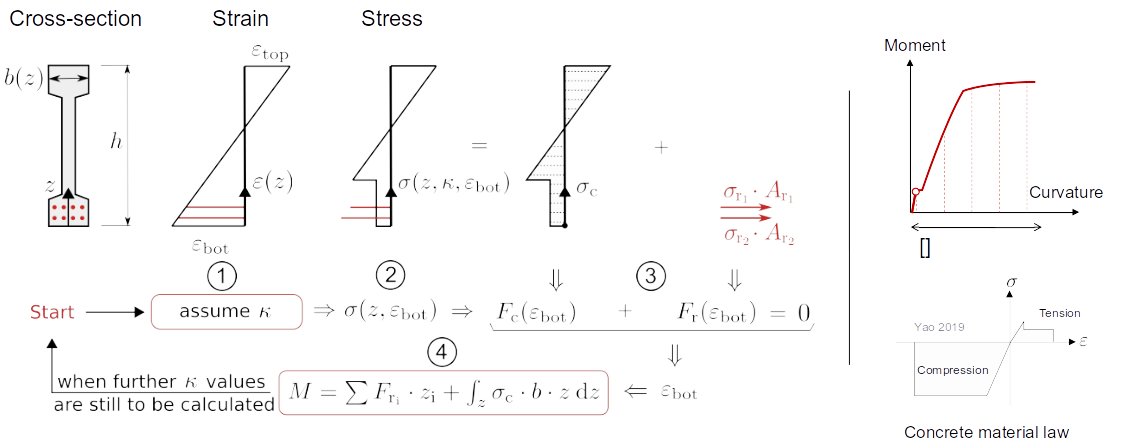

**Iterative scheme:** We want to establish the relation between $\kappa$ and the corresponding bending moment $M$. Therefore, the evaluation starts by prescribing the value of $\kappa$ and finding the corresponding strain $\varepsilon_\mathrm{bot}$ for which the equilibrium condition of normal forces in the cross section is satisfied. Note that the strain at any coordinate $z$ is then given by as a linear profile
$$
 \varepsilon_\mathrm{top} = \kappa z + \varepsilon_{bot}
$$
Thus, by prescribing a fixed value of $\kappa$ and by choosing a trial value $\varepsilon_{bot}$, the strain value  of each concrete ligament and of each reinforcement layer is known. 
With the strain value at each vertical position $z$ is known, we can use the constitutive law of the concrete matrix and of the reinforcement to evaluate the stress profile in concrete $\sigma_\mathrm{c}(z)$ over the height, so that the concrete force is given as
$$
F_\mathrm{c} = \int_0^h \sigma_\mathrm{c}(z) \cdot b \, \mathrm{d}z
$$
and the individual crack bridging force contributions of the reinforcement layers $i$ as
$$
F_\mathrm{r} = \sum_i A_{\mathrm{r},i} \sigma_{\mathrm{r},i}
$$
The equilibrium condition of normal forces then reads 
$$
  F_\mathrm{c}(\varepsilon_\mathrm{bot}) + F_\mathrm{r}(\varepsilon_\mathrm{bot}) = 0
$$
This equation is not fufilled for the trial value of $\varepsilon_\mathrm{bot}$. 
Therefore, the evaluation is repeated for the trial values of $\varepsilon_{bot}$ until a horizontal equilibrium is achieved. Mathematically, the nonlinear equation can be solved using root finding methods provided in mathematical packages. In the present implementation, the method 
[scipy.optimize.root](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html) has been used.

Finally, the $M-\kappa$ relation can be evaluated as an expression
\begin{align}
M(\kappa) = \sum_i F_{\mathrm{r},i}(\kappa) z_i + \int_z \sigma_\mathrm{c} (\kappa) z_i \, \mathrm{d} z
\end{align}

**Example:** Evaluate the $M(\kappa)$ relation for a steel-reinforced concrete cross section with the geometry given in [cm] and reinforcement ratio $\rho = 0.7\%$. Discuss the correspondence between the stress profile of concrete over the cross section and the constitutive law applied as an input?

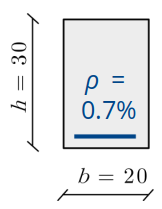

![image.png](cross_sectional_stress_profile.gif)

# **Summary: flexural model for a simply supported beam**

The described scheme represents a commonly used concept of interative scheme to identify the $M-\kappa$ relation. The implementation provided here exploits the flexibility of the Python ecosystem of packages for scientific computing, in particular, the `scipy` solvers of nonlinear equations. Moreover, by introducing the integration over the cross section with a variable width, various cross sectional shapes and nonlinear constitutive laws are covered. 

The above shown model has been implemented in the model component `MKappa`.  covered range of configurations with the specification of inputs and outputs can be summarized as follows

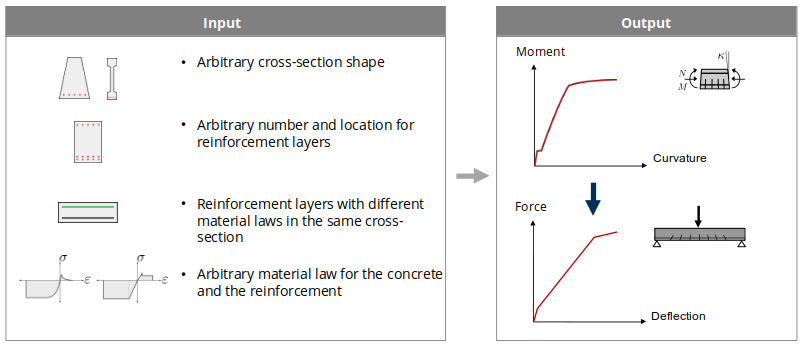

Note that this kind of separation of the cross-sectional response and structural response captures the stress distribution due to the nonlinear behavior over the cross-sectional height. By imposing the kinematic assumption of a linear strain profile over the cross-sectional height, the nonlinear behavior of components, including the crack propagation and debonding of between the reinforcement and matrix can be encapsulated in $M(\kappa)$ relation.

In [ ]:
%matplotlib widget
from bmcs_cross_section.api import MKappa
from bmcs_cross_section.api import ReinfLayer, BarLayer, FabricLayer
from bmcs_cross_section.cs_design.cs_shape import TShape
import matplotlib.pyplot as plt

# **Concrete cross section with short fibers**

To relate described model to the previously shown description of the bended beam in the notebook [7.2](../tour7_cracking/7_1_bending3pt_2d.ipynb#top), let us first simulate a beam without reinforcement. The model is constructed as follows

In [ ]:
mk_plain = MKappa()

By rendering the interactive interface, we can inspect the cross sectional design `cs_design`. The attribute `matrix` specifies the material law of the matrix. The `cross_section_layout` is an empty list, because no reinforcement has been specified. Finally, 

In [ ]:
mk_plain.interact()

# **Steel reinforced cross section**

In [ ]:
mk_steel = MKappa()
bl1 = BarLayer(name='steel 1', z=30, ds=16, count=2 )
csl = mk_steel.cross_section_layout
csl.add_layer(bl1)

In [ ]:
mk_steel.interact()

## Validation of the model using experimental results

Yang et al. (2010), http://dx.doi.org/10.1016/j.engstruct.2010.07.017, Steel reinforcement

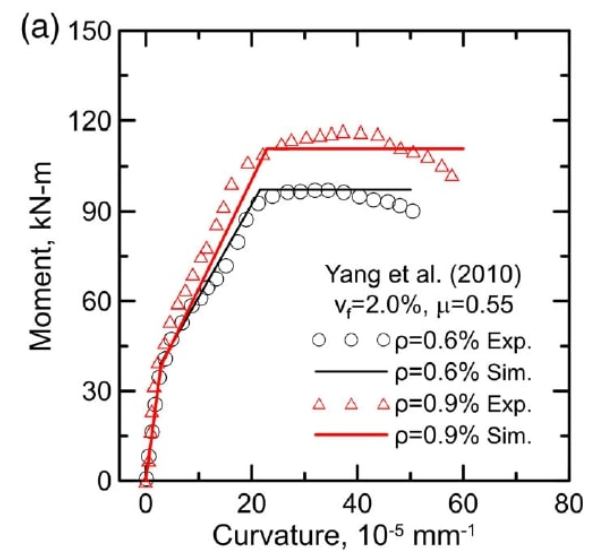

# **Carbon reinforced section**

In [ ]:
mk_carbon = MKappa(high_kappa=0.0002)
mk_carbon.cross_section_shape_.H=30
csl = mk_carbon.cross_section_layout
bl1 = FabricLayer(name='carbon 1', z=5 )
csl.add_layer(bl1)

In [ ]:
mk_carbon.interact()

# **Identify the failure mechanism**

The nonlinear moment curvature curve captures the interaction between the tensile and compressive zone of a beam. Depending on the cross-sectional design, the peak load marks either the tensile or compressive failure of the cross section. The `MKappa` model component can be used to verify the cross sectional capacity calculated using the assessment rules in the design codes.

As an example, let us construct a steel reinforced cross section and configure the cross section in such a way that either the compressive yielding of concrete or tensile yielding of steel will occur.

In [ ]:
mk_mechanism = MKappa(high_kappa=0.0005)
bl1 = BarLayer(name='rebar 1', z=20, ds=24, count=2, matmod='steel')  # material model
bl1.matmod_.trait_set(E=200000, f_t=500)
mk_mechanism.cross_section_layout.add_layer(bl1)
mk_mechanism.cross_section_shape_.trait_set(H=100, B=300)
mk_mechanism.interact()

Exercises 

- compare with the design code concept in EC2 evaluating the moment capacity of a reinforced cross section with the obtained peak load

Points to be added

 - Reference to the iterative procedures in EC2, explain the difference and 
   that the present method is more consistent and not more complicated to implement.
 - Highlight the model components and mechanisms explained in Tours before, i.e. 
   crack-bridging action and to multiple cracking
 - Monotonic versus cyclic
 - Preconfigure the webapp for commercially available reinforcement materials

<div style="background-color:lightgray;text-align:left;width:45%;display:inline-table;"> <img src="../icons/previous.png" alt="Previous trip" width="50" height="50">
    &nbsp; <a href="../tour7_cracking/7_2_fracture_energy_ident.ipynb#top">7.2 Fracture energy identification and size effect</a> 
</div><div style="background-color:lightgray;text-align:center;width:10%;display:inline-table;"> <a href="#top"><img src="../icons/compass.png" alt="Compass" width="50" height="50"></a></div><div style="background-color:lightgray;text-align:right;width:45%;display:inline-table;"> 
    <a href="../tour8_rcbeam/8_2_rc_beam_uls_sls.ipynb#top">8.2 Reinforced beam, ultimate and serviceability limit states</a>&nbsp; <img src="../icons/next.png" alt="Previous trip" width="50" height="50"> </div> 